# 1. SIR model (N = 200, I = 1)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [99]:
# Initial conditions
S_initial = 199
I_initial = 1
R_initial = 0
N = S_initial + I_initial + R_initial

# non-dimensionalize the initial conditions
s_initial = S_initial / N
i_initial = I_initial / N
r_initial = R_initial / N

# Parameters
p = 0.48
q = 10
V = 7200
A = 3
alpha = 1 / 24
gamma = 0.5 / 24  # Removal rate

beta = (p * q) / (V * A)  # Contact rate of one person

R0 = beta * (N / gamma)  # Reproductive ratio
print(R0)


2.1333333333333333


In [100]:
# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return [dsdt, didt, drdt]


In [101]:
from scipy.integrate import odeint

t = np.linspace(0, 40 * 24, 40) # Grid of time points (in days)
print(t)
x_initial = s_initial, i_initial, r_initial
X_initial = S_initial, I_initial, R_initial
soln = odeint(deriv, t=t, y0=x_initial, args=(beta, gamma))
SOLN = odeint(deriv, t=t, y0=X_initial, args=(beta, gamma))
s, i, r = soln.T
S, I, R = SOLN.T
e = None
print(t)


[  0.          24.61538462  49.23076923  73.84615385  98.46153846
 123.07692308 147.69230769 172.30769231 196.92307692 221.53846154
 246.15384615 270.76923077 295.38461538 320.         344.61538462
 369.23076923 393.84615385 418.46153846 443.07692308 467.69230769
 492.30769231 516.92307692 541.53846154 566.15384615 590.76923077
 615.38461538 640.         664.61538462 689.23076923 713.84615385
 738.46153846 763.07692308 787.69230769 812.30769231 836.92307692
 861.53846154 886.15384615 910.76923077 935.38461538 960.        ]
[  0.          24.61538462  49.23076923  73.84615385  98.46153846
 123.07692308 147.69230769 172.30769231 196.92307692 221.53846154
 246.15384615 270.76923077 295.38461538 320.         344.61538462
 369.23076923 393.84615385 418.46153846 443.07692308 467.69230769
 492.30769231 516.92307692 541.53846154 566.15384615 590.76923077
 615.38461538 640.         664.61538462 689.23076923 713.84615385
 738.46153846 763.07692308 787.69230769 812.30769231 836.92307692
 861.5384

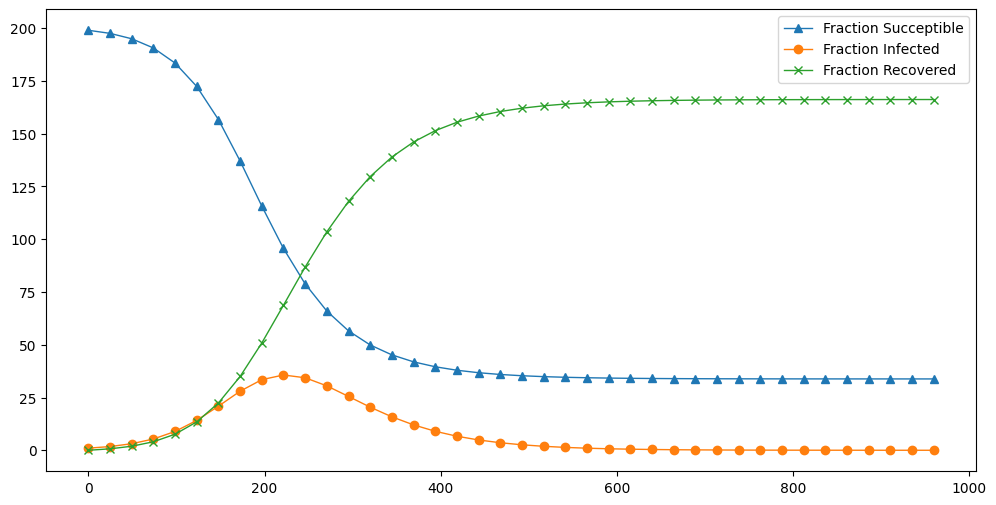

In [102]:
def plotdata(t, s, i, r, e=None):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot()
    ax.plot(t, s, lw=1, marker='^', label='Fraction Succeptible')
    ax.plot(t, i, lw=1, marker='o', label='Fraction Infected')
    if e is not None:
        ax.plot(t, e, lw=1, marker='s', label='Fraction Exposed')
    ax.plot(t, r, lw=1, marker='x', label='Fraction Recovered')
    ax.legend()

plotdata(t, S, I, R, e)


# 2. SEIR model (N = 200)

In [103]:
# Initial conditions
E_initial = 0

# non-dimensionalize the initial conditions
e_initial = E_initial / N


In [104]:
def deriv2(x, t, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt = beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return [dsdt, dedt, didt, drdt]


In [105]:
from scipy.integrate import solve_ivp, odeint

t = np.linspace(0, 40 * 24, 40) # Grid of time points (in days)
x_initial = s_initial, e_initial, i_initial, r_initial
X_initial = S_initial, E_initial, I_initial, R_initial
soln = odeint(deriv2, t=t, y0=x_initial, args=(beta, gamma))
SOLN = odeint(deriv2, t=t, y0=X_initial, args=(beta, gamma))
s, e, i, r = soln.T
S, E, I, R = SOLN.T
e = None


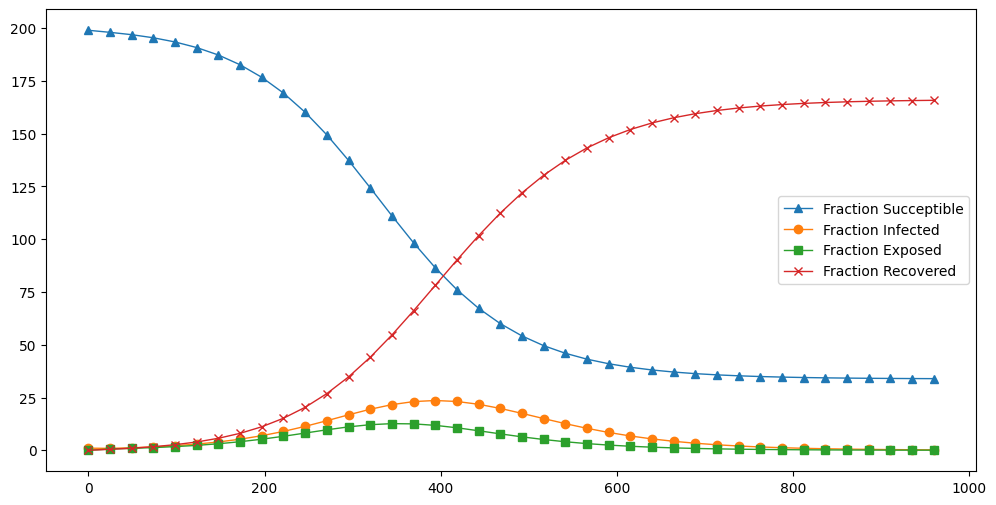

In [106]:
plotdata(t, S, I, R, E)


# 3. Effect of Vaccination in SEIR model (N = 200, I = 1)

In [107]:
# Initial conditions
a = 0.3  # Vaccination rate
sigma = 0.976  # Immunity


In [108]:
def deriv3(x, t, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * (1 - a) * s * i - beta * (1 - sigma) * a * s * i
    dedt = beta * (1 - a) * s * i + beta * (1 - sigma) * a * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt = gamma * i
    return [dsdt, dedt, didt, drdt]


In [109]:
from scipy.integrate import solve_ivp, odeint

t = np.linspace(0, 40 * 24, 40) # Grid of time points (in days)
x_initial = s_initial, e_initial, i_initial, r_initial
X_initial = S_initial, E_initial, I_initial, R_initial
soln = odeint(deriv3, t=t, y0=x_initial, args=(beta, gamma))
SOLN = odeint(deriv3, t=t, y0=X_initial, args=(beta, gamma))
s, e, i, r = soln.T
S, E, I, R = SOLN.T
print(S)
print(E)
print(I)
print(R)
print(S + E + I + R)


[199.         198.33519608 197.69292544 196.97072366 196.13765442
 195.17464539 194.06361142 192.78559556 191.32066996 189.64829164
 187.74789856 185.59972674 183.18584964 180.49143189 177.50615418
 174.22572953 170.65338589 166.80114943 162.69073557 158.35385612
 153.83178716 149.17411743 144.43671572 139.67906422 134.96122692
 130.34077794 125.87002567 121.59380978 117.5480463  113.75907446
 110.24374684 107.01012158 104.05857461 101.3831444   98.97294505
  96.81352215  94.8880682   93.17845283  91.66605425  90.33239811]
[0.         0.40892989 0.55117819 0.65455875 0.76207404 0.88283019
 1.01967304 1.17419482 1.3475625  1.54055343 1.7534209  1.98570791
 2.2360406  2.50192211 2.77955448 3.06372312 3.34778415 3.62379428
 3.88281294 4.11538544 4.31218509 4.46475615 4.56626573 4.61215682
 4.60059536 4.53263718 4.41208659 4.2450751  4.03943668 3.80398271
 3.54778291 3.27953976 3.00711159 2.73720567 2.47523301 2.22529756
 1.99028338 1.77200312 1.57137584 1.38861016]
[1.         0.81226952 

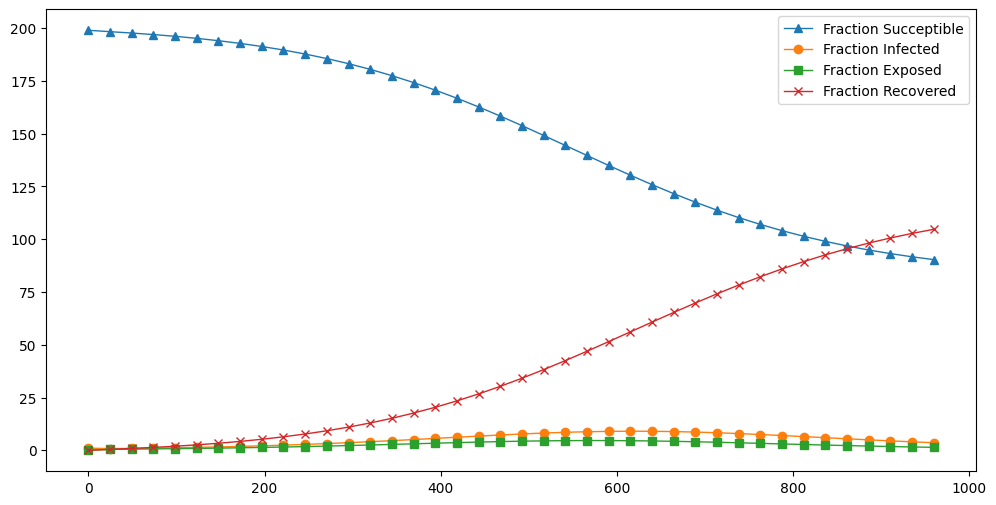

In [110]:
plotdata(t, S, I, R, E)


# 4. SEIR-HCD (SEIR - Hospitalized - Critical - Death)

Using [this](https://www.kaggle.com/code/anjum48/seir-hcd-model/notebook) Kaggle notebook for COVID-19 as a reference.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm.notebook import tqdm
from scipy.integrate import odeint
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error


## Parameters used in the model

- `R_t`: Reproduction number at time `t`.
- `t_inc`: Average incubation period.
- `t_inf`: average infectious period.
- `t_hosp`: Average time a patient is in hospital before either recovering or becoming critical.
- `t_crit`: Average time a patient is in a critical state (either recover or die).
- `m_a`: Fraction of infections that are asymptomatic or mild, or in general, non-severe. `(1 - m_a)` is the severe group.
- `c_a`: Fraction of severe cases that turn critical.
- `f_a`: Fraction of critical cases that are fatal.

$\frac{dS}{dt} = -\frac{R_t}{t_{inf}} * I * S$

$\frac{dE}{dt} = \frac{R_t}{t_{inf}} * I * S - \frac{E}{t_{inc}}$

$\frac{dI}{dt} = \frac{E}{t_{inc}} - \frac{I}{t_{inf}}$

$\frac{dR}{dt} = m_a * \frac{I}{t_{inf}} + (1 - c_a) * \frac{H}{t_{hosp}}$

$\frac{dH}{dt} = (1 - m_a) * \frac{I}{t_{inf}} + (1 - f_a) * \frac{C}{t_{crit}} - \frac{H}{t_{hosp}}$

$\frac{dC}{dt} = c_a * \frac{H}{t_{hosp}} - \frac{C}{t_{crit}}$

$\frac{dD}{dt} = f_a * \frac{C}{t_{crit}}$

In [112]:
def SEIR_HCD_deriv(y, t, R_t, t_inc=2.9, t_inf=5.2, t_hosp=4, t_crit=14, m_a=0.8, c_a=0.1, f_a=0.3):
    S, E, I, R, H, C, D = y

    if callable(R_t):
        reprod = R_t(t)
    else:
        reprod = R_t

    def dS_dt(S, I, R_t, t_inf):
        return -(R_t / t_inf) * I * S

    def dE_dt(S, E, I, R_t, t_inf, t_inc):
        return (R_t / t_inf) * I * S - (E / t_inc)

    def dI_dt(I, E, t_inc, t_inf):
        return (E / t_inc) - (I / t_inf)

    def dH_dt(I, C, H, t_inf, t_hosp, t_crit, m_a, f_a):
        return ((1 - m_a) * (I / t_inf)) + ((1 - f_a) * C / t_crit) - (H / t_hosp)

    def dC_dt(H, C, t_hosp, t_crit, c_a):
        return (c_a * H / t_hosp) - (C / t_crit)

    def dR_dt(I, H, t_inf, t_hosp, m_a, c_a):
        return (m_a * I / t_inf) + (1 - c_a) * (H / t_hosp)

    def dD_dt(C, t_crit, f_a):
        return f_a * C / t_crit

    S_out = dS_dt(S, I, reprod, t_inf)
    E_out = dE_dt(S, E, I, reprod, t_inf, t_inc)
    I_out = dI_dt(I, E, t_inc, t_inf)
    R_out = dR_dt(I, H, t_inf, t_hosp, m_a, c_a)
    H_out = dH_dt(I, C, H, t_inf, t_hosp, t_crit, m_a, f_a)
    C_out = dC_dt(H, C, t_hosp, t_crit, c_a)
    D_out = dD_dt(C, t_crit, f_a)

    return [S_out, E_out, I_out, R_out, H_out, C_out, D_out]


In [113]:
def plot_model(solution, title='SEIR+HCD model'):
    sus, exp, inf, rec, hosp, crit, death = solution.T

    cases = inf + rec + hosp + crit + death

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(title)

    ax1.plot(sus, 'tab:blue', label='Susceptible')
    ax1.plot(exp, 'tab:orange', label='Exposed')
    ax1.plot(inf, 'tab:red', label='Infected')
    ax1.plot(rec, 'tab:green', label='Recovered')
    ax1.plot(hosp, 'tab:purple', label='Hospitalised')
    ax1.plot(crit, 'tab:brown', label='Critical')
    ax1.plot(death, 'tab:cyan', label='Deceased')

    ax1.set_xlabel("Days", fontsize=10)
    ax1.set_ylabel("Fraction of population", fontsize=10)
    ax1.legend(loc='best')

    ax2.plot(cases, 'tab:red', label='Cases')
    ax2.set_xlabel("Days", fontsize=10)
    ax2.set_ylabel("Fraction of population (Cases)", fontsize=10, color='tab:red')

    ax3 = ax2.twinx()
    ax3.plot(death, 'tab:cyan', label='Deceased')
    ax3.set_xlabel("Days", fontsize=10)
    ax3.set_ylabel("Fraction of population (Fatalities)", fontsize=10, color='tab:cyan')


[0.0424829  0.17797297 0.17211258 0.56602977 0.03658584 0.00306637
 0.00174957]


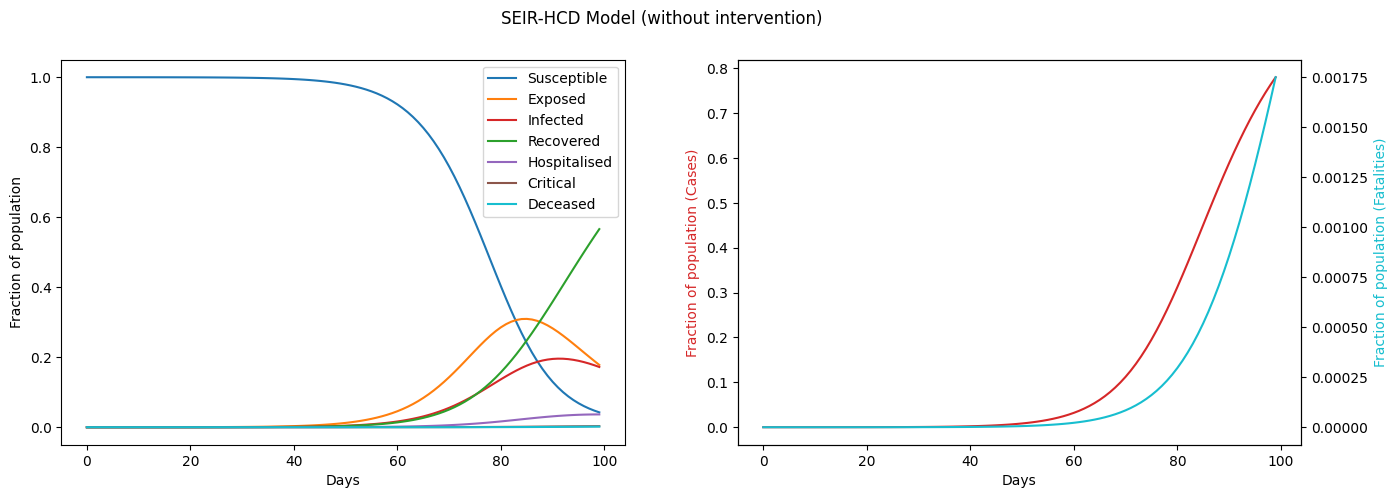

In [114]:
N = 100000  # Population size
n_infected = 1
max_days = 100

# State at time = 0 for SEIR_HCD model
# The numbers correspond to the number of people in each of the SEIRHCD compartments
initial_state = [(N - n_infected) / N, 0, n_infected / N, 0, 0, 0, 0]

R_0 = 5.2
t_inc = 11
t_inf = 8
t_hosp = 8
t_crit = 8
m_a = 0.8
c_a = 0.1
f_a = 0.3

args = (R_0, t_inc, t_inf, t_hosp, t_crit, m_a, c_a, f_a)

t = np.linspace(0, max_days, max_days)

sol = odeint(SEIR_HCD_deriv, y0=initial_state, t=t, args=args)

plot_model(sol, 'SEIR-HCD Model (without intervention)')
print(sol[-1])


# 5. SIER - HCD with vaccination coverage

In [115]:
def SEIR_HCD_deriv_with_vaccination(y, t, R_t, t_inc=2.9, t_inf=5.2, t_hosp=4, t_crit=14, m_a=0.8, c_a=0.1, f_a=0.3, v_rate=0.3, sigma=0.976):
    S, E, I, R, H, C, D = y

    if callable(R_t):
        reprod = R_t(t)
    else:
        reprod = R_t

    def dS_dt(S, I, R_t, t_inf, v_rate, sigma):
        return - (R_t / t_inf) * (1 - v_rate) * I * S - (R_t / t_inf) * (1 - sigma) * v_rate * I * S

    def dE_dt(S, E, I, R_t, t_inf, t_inc, v_rate, sigma):
        return (R_t / t_inf) * (1 - v_rate) * I * S + (R_t / t_inf) * (1 - sigma) * v_rate * S * I - (E / t_inc)

    def dI_dt(I, E, t_inc, t_inf):
        return (E / t_inc) - (I / t_inf)

    def dH_dt(I, C, H, t_inf, t_hosp, t_crit, m_a, f_a):
        return ((1 - m_a) * (I / t_inf)) + ((1 - f_a) * C / t_crit) - (H / t_hosp)

    def dC_dt(H, C, t_hosp, t_crit, c_a):
        return (c_a * H / t_hosp) - (C / t_crit)

    def dR_dt(I, H, t_inf, t_hosp, m_a, c_a):
        return (m_a * I / t_inf) + (1 - c_a) * (H / t_hosp)

    def dD_dt(C, t_crit, f_a):
        return f_a * C / t_crit

    S_out = dS_dt(S, I, reprod, t_inf, v_rate, sigma)
    E_out = dE_dt(S, E, I, reprod, t_inf, t_inc, v_rate, sigma)
    I_out = dI_dt(I, E, t_inc, t_inf)
    R_out = dR_dt(I, H, t_inf, t_hosp, m_a, c_a)
    H_out = dH_dt(I, C, H, t_inf, t_hosp, t_crit, m_a, f_a)
    C_out = dC_dt(H, C, t_hosp, t_crit, c_a)
    D_out = dD_dt(C, t_crit, f_a)

    return [S_out, E_out, I_out, R_out, H_out, C_out, D_out]


[ 4.88082011e-02 -4.34936351e-09 -4.81806746e-09  9.45055089e-01
 -2.23181310e-09 -4.06839628e-10  6.13672155e-03]


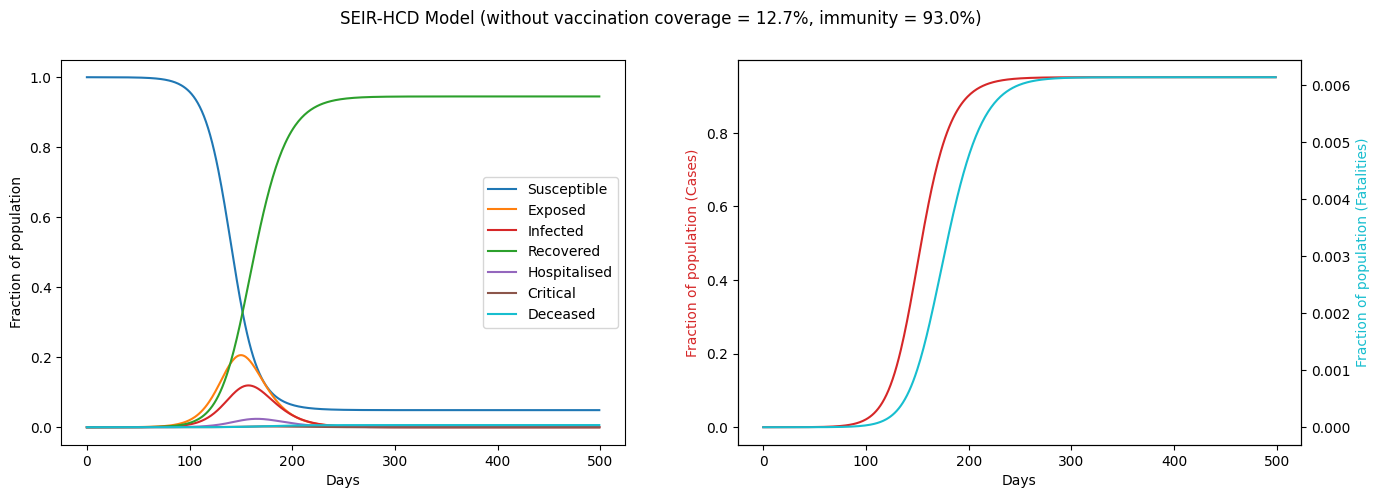

In [116]:
N = 100000  # Population size
n_infected = 1
max_days = 500

# State at time = 0 for SEIR_HCD model
# The numbers correspond to the number of people in each of the SEIRHCD compartments
initial_state = [(N - n_infected) / N, 0, n_infected / N, 0, 0, 0, 0]

R_0 = 3.6
t_inc = 13
t_inf = 8
t_hosp = 8
t_crit = 8
m_a = 0.8
c_a = 0.1
f_a = 0.3
v_rate = 0.127  # Vaccination rate
sigma = 0.930  # Immunity

args = (R_0, t_inc, t_inf, t_hosp, t_crit, m_a, c_a, f_a, v_rate, sigma)

t = np.linspace(0, max_days, max_days)

sol = odeint(SEIR_HCD_deriv_with_vaccination, y0=initial_state, t=t, args=args)

plot_model(sol, 'SEIR-HCD Model (without vaccination coverage = 12.7%, immunity = 93.0%)')
print(sol[-1])


In [117]:
def time_varying_reproduction(t):
    if 0 <= t < 200:
        return 1.6
    if 200 <= t < 400:
        return 3.6
    if 400 <= t:
        return 2.6


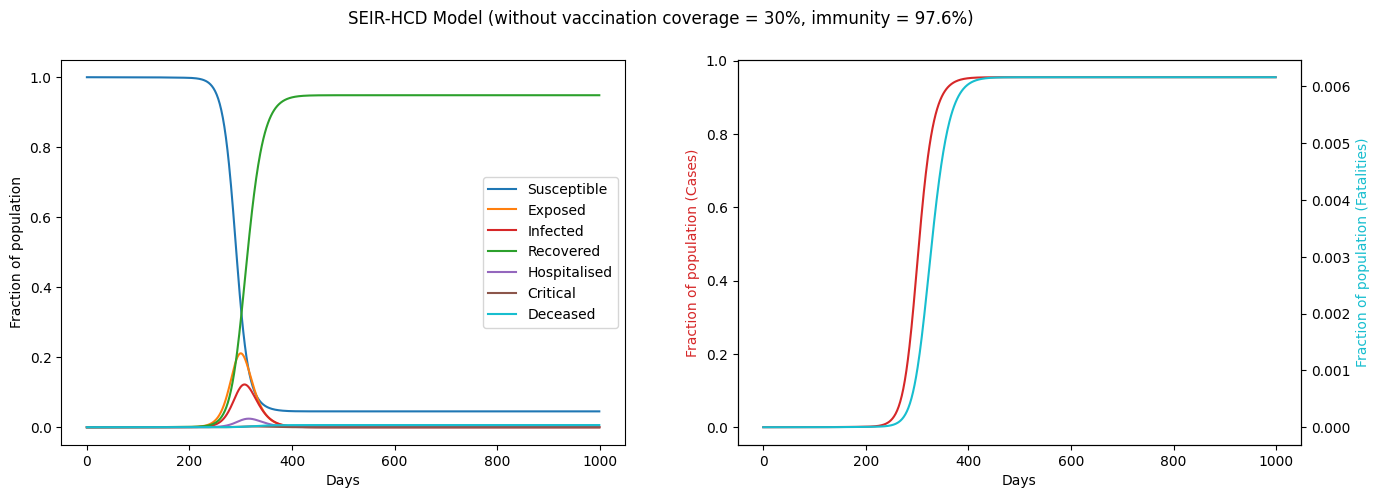

In [118]:
N = 100000  # Population size
n_infected = 1
max_days = 1000

# State at time = 0 for SEIR_HCD model
# The numbers correspond to the number of people in each of the SEIRHCD compartments
initial_state = [(N - n_infected) / N, 0, n_infected / N, 0, 0, 0, 0]

t_inc = 13
t_inf = 8
t_hosp = 8
t_crit = 8
m_a = 0.8
c_a = 0.1
f_a = 0.3
v_rate = 0.1  # Vaccination rate
sigma = 0.976  # Immunity

args = (time_varying_reproduction, t_inc, t_inf, t_hosp, t_crit, m_a, c_a, f_a, v_rate, sigma)

t = np.linspace(0, max_days, max_days)

sol = odeint(SEIR_HCD_deriv_with_vaccination, y0=initial_state, t=t, args=args)

plot_model(sol, 'SEIR-HCD Model (without vaccination coverage = 30%, immunity = 97.6%)')


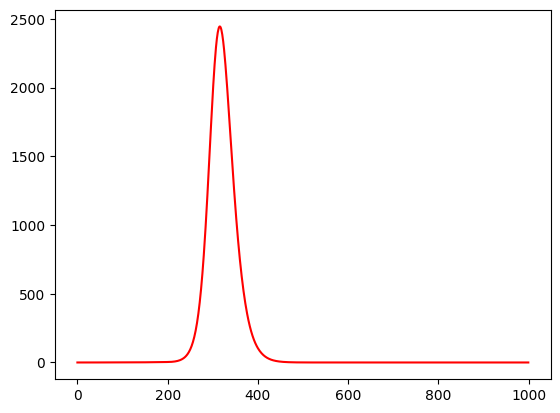

In [119]:
sus, exp, inf, rec, hosp, crit, death = sol.T

plt.plot(hosp * N, 'r', label='Hospitalised')


# 6. Fit the data

Variables that can be altered to fit the model to real data:

- Average hospitalization period `t_hosp`
- Average critical period `t_crit`
- Fraction of mild/asymptomatic cases `m_a`
- Fraction of severe cases that turn critical `c_a`
- Fraction of critical cases that result in a fatality `f_a`
- Reproduction number `R_0`
- Vaccination coverage `v_rate`

As our model does not consider about intervention, `R_0` can be a constant.

## Choosing data, training range and testing range

We used the data provided by the National Hospital of Pediatrics Hanoi, Vietnam. The data consists of reported cases from 2017 to 2019. The data was divided into 3 categories:

- `confirmed` for cases confirmed by the hospital (not by the government with nationalwide data). The number is cummulative.
- `hospitalized` for hospitalized cases. The data stands for the number of active cases at that date.
- `fatalities` for number of cases with death outcome. The number is cummulative.

(days_of_hospitalization    1.0
 dtype: float64,
 days_of_hospitalization    170.0
 dtype: float64,
 days_of_hospitalization    11.445946
 dtype: float64,
 days_of_hospitalization    6.0
 dtype: float64,
       days_of_hospitalization
 0                        25.0
 1                         8.0
 2                         3.0
 3                        69.0
 4                        34.0
 ...                       ...
 2067                    169.0
 2068                     60.0
 2069                     56.0
 2070                     21.0
 2071                     29.0
 
 [2072 rows x 1 columns],
             confirmed  hospitalized  fatalities  min   max
 date                                                      
 2019-01-01        757            39           0  NaN   NaN
 2019-01-02        761            43           0  NaN  43.0
 2019-01-03        766            36           0  NaN   NaN
 2019-01-04        768            33           0  NaN   NaN
 2019-01-05        772            34

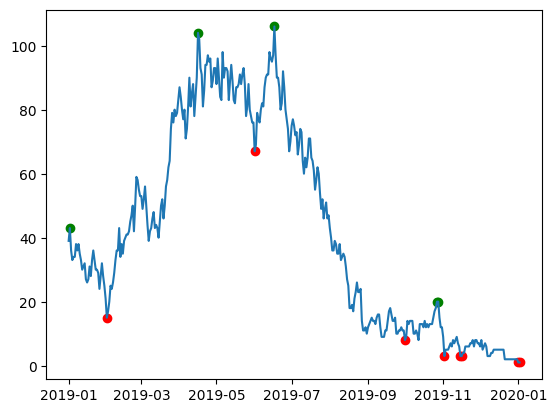

In [120]:
data_path = Path('../Data/')

train = pd.read_csv(data_path / 'out.csv', parse_dates=['test_date', 'admission_date', 'testresult_date', 'onset_date', 'discharge_date'])

# START_DATE = train['admission_date'].min()
START_DATE = pd.to_datetime('2019-01-01')
END_DATE = train['discharge_date'].max()
# END_DATE = pd.to_datetime('2018-03-23')

train_full = pd.DataFrame()
train_full.insert(0, 'date', pd.date_range(start=START_DATE, end=END_DATE))
train_full.insert(1, 'confirmed', 0)  # Confirmed cases, cumulative
train_full.insert(2, 'hospitalized', 0)  # Hospitalized cases, active
train_full.insert(3, 'fatalities', 0) # Fatalities, cumulative

hospitalization = pd.DataFrame()
hospitalization.insert(0, 'days_of_hospitalization', 0)

POPULATION = 35_076_473

for i in range(train_full.shape[0]):
    train_full.at[i, 'confirmed'] = train[(train['admission_date'] <= train_full['date'][i])].shape[0]
    train_full.at[i, 'hospitalized'] = train[(train['admission_date'] <= train_full['date'][i]) & (train_full['date'][i] <= train['discharge_date'])].shape[0]
    train_full.at[i, 'fatalities'] = train[(train_full['date'][0] <= train['discharge_date']) & (train['discharge_date'] <= train_full['date'][i]) & (train['outcome_died'] == 1)].shape[0]

for i in range(train.shape[0]):
    hospitalization.at[i, 'days_of_hospitalization'] = (train['discharge_date'][i] - train['admission_date'][i]).days

from scipy.signal import argrelextrema

# train_full.set_index('date', inplace=True)
train_full['min'] = train_full.iloc[argrelextrema(train_full['hospitalized'].values, np.less_equal, order=30)[0]]['hospitalized']
train_full['max'] = train_full.iloc[argrelextrema(train_full['hospitalized'].values, np.greater_equal, order=30)[0]]['hospitalized']
plt.scatter(train_full['date'], train_full['min'], c='r')
plt.scatter(train_full['date'], train_full['max'], c='g')
plt.plot(train_full['date'], train_full['hospitalized'], label='Hospitalized')

train_full.set_index('date', inplace=True)

hospitalization.min(), hospitalization.max(), hospitalization.mean(), hospitalization.median(), hospitalization, train_full, train_full[train_full['min'].notnull()], train_full[train_full['max'].notnull()]


We chose the fixed infection period and incubation period based on [1].

In [121]:
t_inf = 8
t_inc = 11


Our data had different 

In [122]:
DATE_RANGE = [
    (START_DATE, pd.to_datetime('2018-03-23')),
    (pd.to_datetime('2018-03-24'), pd.to_datetime('2019-02-01')),
    (pd.to_datetime('2019-02-02'), END_DATE),
]

PHASE_COUNT = len(DATE_RANGE)


We used mean squared log error in order to evaluate the difference between the `pred` (modeled) and `true` (actual) number of hospitalized cases and fatalities. We provided a simple weight as shown below, which allowed the most recent cases to have more impact on the outcome than the earlier cases.

In [123]:
# Use a constant reproduction number
def eval_model_const(params, data, population, hosp_init, fat_init, return_solution=False):
    R_0, t_hosp, t_crit, m, c, f = params

    N = population
    n_infected = 50  # TODO: Change this
    max_days = len(data)

    initial_state = [(N - n_infected) / N, 0, n_infected / N, 0, hosp_init / N, 0, fat_init / N]

    args = (R_0, t_inf, t_inc, t_hosp, t_crit, m, c, f)

    sol = odeint(SEIR_HCD_deriv, y0=initial_state, t=np.arange(0, max_days), args=args)
    sus, exp, inf, rec, hosp, crit, death = sol.T

    y_pred_hosp = np.clip(hosp + crit, 0, np.inf) * population
    y_true_hosp = data['hospitalized'].values
    y_pred_fat = np.clip(death, 0, np.inf) * population
    y_true_fat = data['fatalities'].values

    # weight = 1 / np.arange(1, len(y_true_hosp) + 1)[::-1]
    weight = None
    msle_hosp = mean_squared_log_error(y_true_hosp, y_pred_hosp, sample_weight=weight)
    msle_fat = mean_squared_log_error(y_true_fat, y_pred_fat, sample_weight=weight)

    msle_final = np.mean([msle_hosp, msle_fat])

    if return_solution:
        return msle_final, sol
    else:
        return msle_final


In [124]:
def plot_model_results(y_pred, train_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    ax1.set_title('Hospitalized')
    ax2.set_title('Fatalities')
    train_data['hospitalized'].plot(label='Active hospitalized cases (Actual)', color='g', ax=ax1)
    train_data['fatalities'].plot(label='Fatalities (Actual)', color='g', ax=ax2)
    y_pred['R'].plot(label='R', color='b', ax=ax1)
    y_pred['hospitalized'].plot(label='Active hospitalized cases (Modeled)', color='r', ax=ax1)
    y_pred['fatalities'].plot(label='Fatalities (Modeled)', color='r', ax=ax2)
    ax2.legend(loc='best')

    y_pred['min'] = y_pred.iloc[argrelextrema(y_pred['hospitalized'].values, np.less_equal, order=100)[0]]['hospitalized']
    y_pred['max'] = y_pred.iloc[argrelextrema(y_pred['hospitalized'].values, np.greater_equal, order=100)[0]]['hospitalized']
    print(y_pred[y_pred['min'].notnull()])
    print(y_pred[y_pred['max'].notnull()])
    ax1.scatter(train_data.index, y_pred['min'], c='r')
    ax1.scatter(train_data.index, y_pred['max'], c='g')
    ax1.legend(loc='best')

    # fig.suptitle('Image 1. Modeled vs. Actual Hospitalized and Fatalities', fontsize=16)


In [125]:
def fit_model(initial_guess=[3.6, 8, 8, 0.9, 0.1, 0.3],
              bounds=((0, 20), # R bounds
              (1, 15), (1, 15), # transition time param bounds
              (0.5, 1), (0, 1), (0, 1)), # fraction time param bounds
              make_plot=True):
    train_data = train_full
    population = POPULATION

    # Get the initial hospitalized and death count from training data at START_DATE
    hospitalized_init = train_data.loc[START_DATE, 'hospitalized']
    fatalities_init = train_data.loc[START_DATE, 'fatalities']

    res_const = minimize(eval_model_const, initial_guess, bounds=bounds,
                         args=(train_data, population, hospitalized_init, fatalities_init, False),
                         method='L-BFGS-B')

    msle, sol = eval_model_const(res_const.x, train_data, population, hospitalized_init, fatalities_init, True)
    res = res_const

    R_t = res.x[0]

    sus, exp, inf, rec, hosp, crit, death = sol.T

    y_pred = pd.DataFrame({
        'R': R_t,
        'hospitalized': np.clip(hosp + crit, 0, np.inf) * population,
        'fatalities': np.clip(death, 0, np.inf) * population,
    }, index=train_data.index)


    if make_plot:
        print(f'MSLE: {msle:0.5f}')
        print(
            f'R: {res.x[0]:0.3f}, t_hosp: {res.x[1]:0.3f}, t_crit: {res.x[2]:0.3f}, '
            f'm: {res.x[3]:0.3f}, c: {res.x[4]:0.3f}, f: {res.x[5]:0.3f} \n'
        )
        print(f'Death (modeled): {death[-1] * population}')
        print(f'Death (trained): {train_data["fatalities"].iloc[-1]}')
        print(f'Death percentage error: {100 * (death[-1] * population - train_data["fatalities"].iloc[-1]) / train_data["fatalities"].iloc[-1]}%')
        # Get hospitalized from y_pred at y_pred max
        print(f'Hospitalized (modeled): {y_pred["hospitalized"].max()}')
        print(f'Hospitalized (trained): {train_data["hospitalized"].max()}')
        print(f'Hospitalized percentage error: {100 * (y_pred["hospitalized"].max() - train_data["hospitalized"].max()) / train_data["hospitalized"].max()}%')

    plot_model_results(y_pred, train_full)

    return msle


MSLE: 0.08750
R: 7.668, t_hosp: 7.540, t_crit: 7.441, m: 1.000, c: 0.832, f: 0.026 

Death (modeled): 21.41626125401836
Death (trained): 22
Death percentage error: -2.6533579362801873%
Hospitalized (modeled): 107.19166669238959
Hospitalized (trained): 106
Hospitalized percentage error: 1.1242138607448953%
                   R  hospitalized  fatalities        min  max
date                                                          
2019-02-24  7.668063     19.539373    2.156930  19.539373  NaN
2020-01-02  7.668063      3.791331   21.416261   3.791331  NaN
                   R  hospitalized  fatalities  min         max
date                                                           
2019-04-15  7.668063    107.191667    6.487711  NaN  107.191667


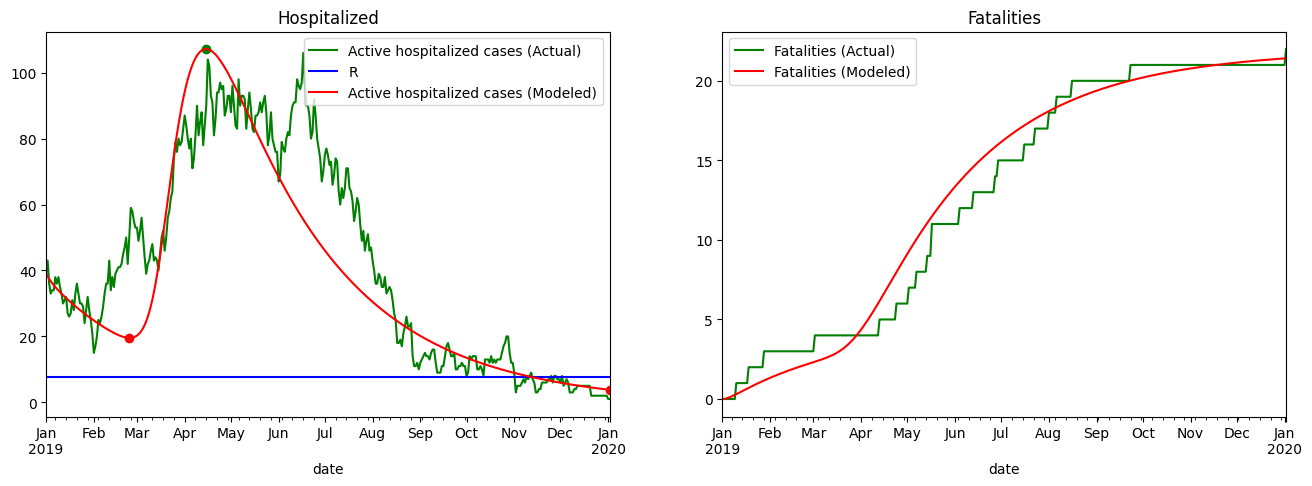

In [126]:
msle = fit_model()
# print(train_full)


# 7. Fit the data with vaccination

In [127]:
# Use a constant reproduction number
def eval_model_const_with_vaccination(params, data, population, hosp_init, fat_init, return_solution=False):
    R_0, t_hosp, t_crit, m, c, f, v_rate, sigma = params

    N = population
    n_infected = 50  # TODO: Change this
    max_days = len(data)

    initial_state = [(N - n_infected) / N, 0, n_infected / N, 0, hosp_init / N, 0, fat_init / N]

    args = (R_0, t_inf, t_inc, t_hosp, t_crit, m, c, f, v_rate, sigma)

    sol = odeint(SEIR_HCD_deriv_with_vaccination, y0=initial_state, t=np.arange(0, max_days), args=args)
    sus, exp, inf, rec, hosp, crit, death = sol.T

    y_pred_hosp = np.clip(hosp + crit, 0, np.inf) * population
    y_true_hosp = data['hospitalized'].values
    y_pred_fat = np.clip(death, 0, np.inf) * population
    y_true_fat = data['fatalities'].values

    # weight = 1 / np.arange(1, len(y_true_hosp) + 1)[::-1]
    weight = None
    msle_hosp = mean_squared_log_error(y_true_hosp, y_pred_hosp, sample_weight=weight)
    msle_fat = mean_squared_log_error(y_true_fat, y_pred_fat, sample_weight=weight)

    msle_final = np.mean([msle_hosp, msle_fat])

    if return_solution:
        return msle_final, sol
    else:
        return msle_final


In [128]:
def fit_model_with_vaccination(initial_guess=[3.6, 8, 8, 0.9, 0.1, 0.3, 0.127, 0.93],
              bounds=((0, 20), # R bounds
              (1, 15), (1, 15), # transition time param bounds
              (0.5, 1), (0, 1), (0, 1), # fraction time param bounds
              (0.127, 0.127), (0, 1)), # vaccination rate bounds, constant for vaccination rate
              make_plot=True):
    train_data = train_full
    population = POPULATION

    # Get the initial hospitalized and death count from training data at START_DATE
    hospitalized_init = train_data.loc[START_DATE, 'hospitalized']
    fatalities_init = train_data.loc[START_DATE, 'fatalities']

    res_const = minimize(eval_model_const_with_vaccination, initial_guess, bounds=bounds,
                         args=(train_data, population, hospitalized_init, fatalities_init, False),
                         method='L-BFGS-B')

    msle, sol = eval_model_const_with_vaccination(res_const.x, train_data, population, hospitalized_init, fatalities_init, True)
    msle, sol = eval_model_const_with_vaccination(res_const.x, train_data, population, hospitalized_init, fatalities_init, True)
    res = res_const

    R_t = res.x[0]

    sus, exp, inf, rec, hosp, crit, death = sol.T

    y_pred = pd.DataFrame({
        'R': R_t,
        'hospitalized': np.clip(hosp + crit, 0, np.inf) * population,
        'fatalities': np.clip(death, 0, np.inf) * population,
    }, index=train_data.index)


    if make_plot:
        print(f'MSLE: {msle:0.5f}')
        print(
            f'R: {res.x[0]:0.3f}, t_hosp: {res.x[1]:0.3f}, t_crit: {res.x[2]:0.3f}, '
            f'm: {res.x[3]:0.3f}, c: {res.x[4]:0.3f}, f: {res.x[5]:0.3f}, v_rate: {res.x[6]:0.3f}, sigma: {res.x[7]:0.3f} \n'
        )
        modeled_deaths = death[-1] * population
        trained_deaths = train_data["fatalities"].iloc[-1]
        percentage_death = 100 * np.abs(modeled_deaths - trained_deaths) / trained_deaths
        rmsle_deaths = mean_squared_log_error(train_data["fatalities"], y_pred["fatalities"])
        print(f'Death (modeled): {modeled_deaths}')
        print(f'Death (trained): {trained_deaths}')
        # print(f'Death percentage error: {percentage_death}%')
        print(f'Death MSLE: {rmsle_deaths}')
        # Get hospitalized from y_pred at y_pred max
        modeled_hosp = y_pred["hospitalized"].max()
        trained_hosp = train_data["hospitalized"].max()
        percentage_hosp = 100 * np.abs(modeled_hosp - trained_hosp) / trained_hosp
        rmsle_hosp = mean_squared_log_error(train_data["hospitalized"], y_pred["hospitalized"])
        print(f'Hospitalized (modeled): {modeled_hosp}')
        print(f'Hospitalized (trained): {trained_hosp}')
        # print(f'Hospitalized percentage error: {percentage_hosp}%')
        print(f'Hospitalized MSLE: {rmsle_hosp}')

    plot_model_results(y_pred, train_full)

    return msle, res.x


MSLE: 0.08808
R: 7.501, t_hosp: 6.990, t_crit: 8.017, m: 1.000, c: 0.830, f: 0.026, v_rate: 0.127, sigma: 0.003 

Death (modeled): 21.46505428703461
Death (trained): 22
Death MSLE: 0.03834826915475782
Hospitalized (modeled): 106.49542871382623
Hospitalized (trained): 106
Hospitalized MSLE: 0.13781206200029097
                   R  hospitalized  fatalities        min  max
date                                                          
2019-02-25  7.501459     19.114516    2.189818  19.114516  NaN
2020-01-02  7.501459      3.763662   21.465054   3.763662  NaN
                   R  hospitalized  fatalities  min         max
date                                                           
2019-04-16  7.501459    106.495429    6.497748  NaN  106.495429


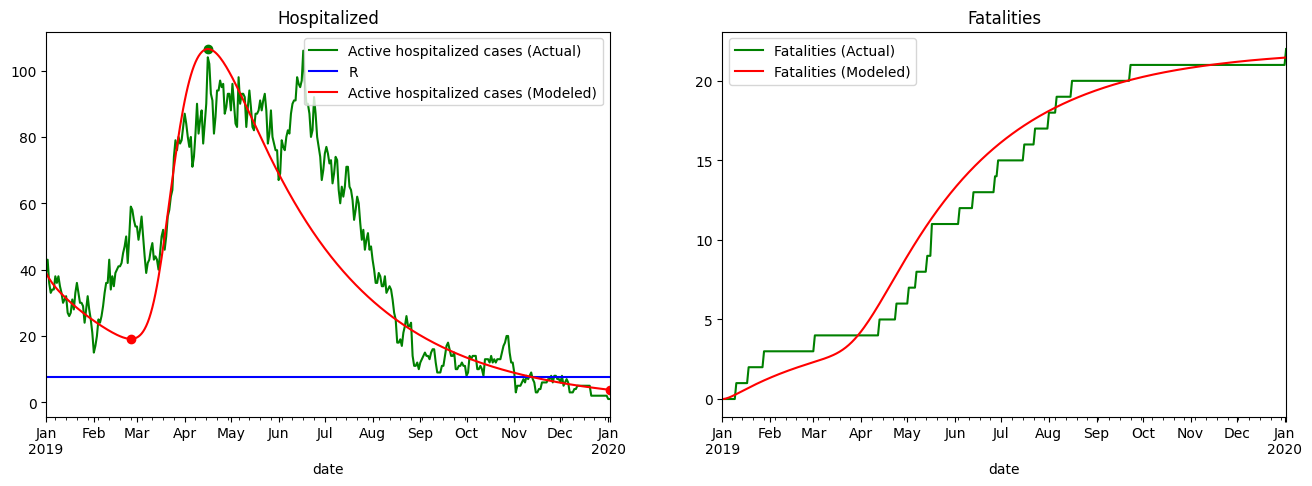

In [129]:
msle, (R_0, t_hosp, t_crit, m, c, f, v_rate, sigma) = fit_model_with_vaccination()
